Dataset loaded successfully.
First few rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

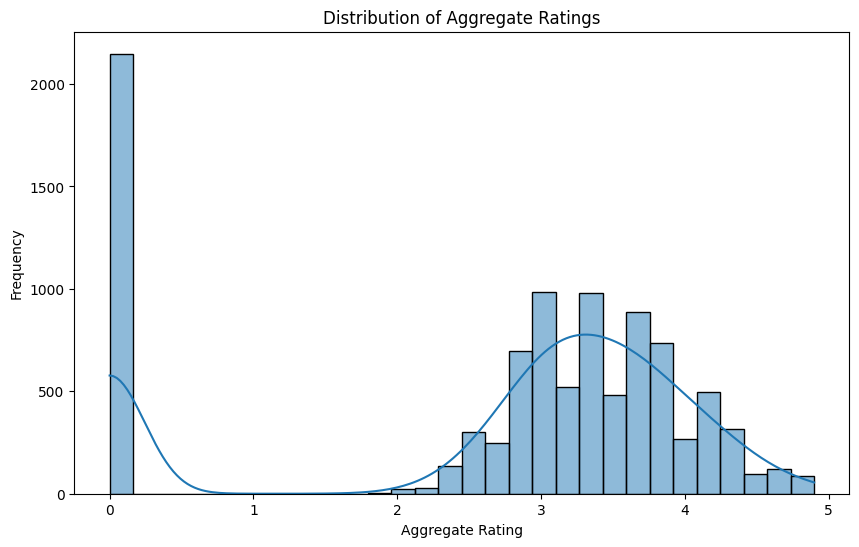

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"Dataset .csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error loading the dataset: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()
print("First few rows of the dataset:")
print(data.head())
print("Columns in the dataset:")
print(data.columns.tolist())
data.columns = data.columns.str.strip()
print("Missing values before handling:")
print(data.isnull().sum())
for column in data.columns:
    if data[column].isnull().any():
        if data[column].dtype == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].mean())
target_column = 'Aggregate rating'
if target_column not in data.columns:
    print(f"Error: '{target_column}' column not found in the dataset.")
    print("Available columns are:", data.columns.tolist())
    exit()

X = data.drop(target_column, axis=1)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
if isinstance(model.named_steps['regressor'], LinearRegression):
    coefficients = model.named_steps['regressor'].coef_
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    print("Feature Importances:")
    print(feature_importance.sort_values(by='Coefficient', ascending=False))
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], bins=30, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()